In [2]:
#  1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [4]:
#  2. Load dataset
df = pd.read_csv("Datasets/symptom_based_parkinson_data.csv")

In [5]:
#  3. Quick look at the data
print("🔍 First 5 rows:")
print(df.head())

🔍 First 5 rows:
   tremors  bradykinesia  muscle_stiffness  balance_issues  voice_changes  \
0        0             0                 1               0              0   
1        1             1                 1               1              1   
2        0             0                 0               1              0   
3        0             0                 0               1              0   
4        0             1                 1               0              1   

   facial_expression_changes  parkinson_disease  
0                          1                  0  
1                          0                  1  
2                          0                  0  
3                          0                  0  
4                          0                  0  


In [6]:
print("\n📊 Data Summary:")
print(df.describe())


📊 Data Summary:
          tremors  bradykinesia  muscle_stiffness  balance_issues  \
count  200.000000     200.00000        200.000000      200.000000   
mean     0.500000       0.50500          0.555000        0.510000   
std      0.501255       0.50123          0.498213        0.501154   
min      0.000000       0.00000          0.000000        0.000000   
25%      0.000000       0.00000          0.000000        0.000000   
50%      0.500000       1.00000          1.000000        1.000000   
75%      1.000000       1.00000          1.000000        1.000000   
max      1.000000       1.00000          1.000000        1.000000   

       voice_changes  facial_expression_changes  parkinson_disease  
count     200.000000                 200.000000         200.000000  
mean        0.480000                   0.445000           0.340000  
std         0.500854                   0.498213           0.474898  
min         0.000000                   0.000000           0.000000  
25%         0.00

In [7]:
# 📌 4. Split features and target
X = df.drop("parkinson_disease", axis=1)
y = df["parkinson_disease"]

In [8]:
# 📌 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 📌 6. Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# 📌 7. Make predictions
y_pred = model.predict(X_test)

In [11]:
# 📌 8. Evaluate the model
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.95

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.83      0.91        12

    accuracy                           0.95        40
   macro avg       0.97      0.92      0.94        40
weighted avg       0.95      0.95      0.95        40



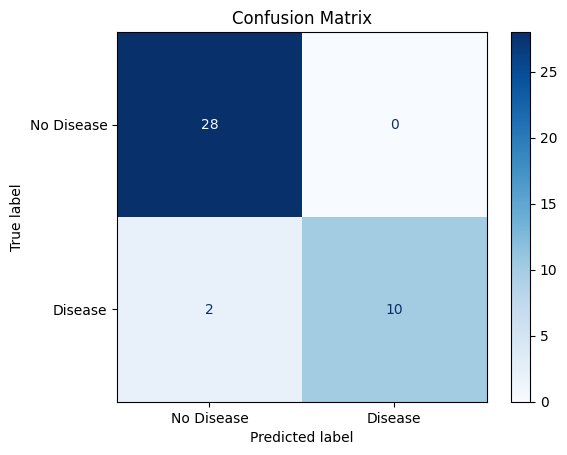

In [12]:
# 📌 9. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

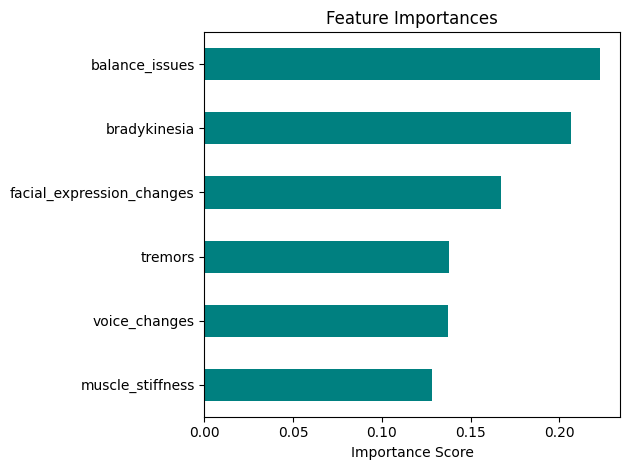

In [13]:
# 📌 10. Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [17]:
import pickle

# Save the model to a file
with open("parkinson_rf_model.sav", "wb") as f:
    pickle.dump(model, f)

In [18]:
print("✅ Model saved as 'parkinson_rf_model.sav'")

✅ Model saved as 'parkinson_rf_model.sav'


In [19]:
with open("parkinson_rf_model.sav", "rb") as f:
    loaded_model = pickle.load(f)